<img src=https://i.postimg.cc/1XtqnNCz/ntflix.jpg alt="Netflix Image">


<h1 style="font-family: 'Verdana', sans-serif; color: white; background-color: #C0392B; 
           padding: 15px 30px; text-align:center; border-radius: 8px; width: fit-content; margin: 40px auto;">
  Netflix Data Analytics
</h1>

In [59]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
  Data Exploration:
</h1>

In [60]:
#loading the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
df.shape

(8807, 12)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [63]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
  Data Cleaning
</h1>

In [64]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [65]:
df['director'] =df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] =df['date_added'].fillna(df['date_added'].mode()[0])
df['duration'] =df['duration'].fillna(df['duration'].mode()[0])

In [66]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

In [67]:
df.duplicated().sum()

np.int64(0)

<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Descriptive statistics 
</h1> 

In [68]:
# ---- Movies Statistics (duration in minutes) ----
movies = df[df['duration_type'].str.lower() == 'min']
movie_durations = movies['duration_num']

print("🎬 Movie Duration Stats (minutes):")
print("Mean:", movie_durations.mean())
print("Median:", movie_durations.median())
print("Mode:", movie_durations.mode()[0])
print("Range:", movie_durations.max() - movie_durations.min())
print("Standard Deviation:", movie_durations.std())
print()

# ---- TV Shows Statistics (duration in seasons) ----
tv_shows = df[df['duration_type'].str.lower() == 'season']
tv_durations = tv_shows['duration_num']

print("📺 TV Show Duration Stats (seasons):")
print("Mean:", tv_durations.mean())
print("Median:", tv_durations.median())
print("Mode:", tv_durations.mode()[0])
print("Range:", tv_durations.max() - tv_durations.min())
print("Standard Deviation:", tv_durations.std())


🎬 Movie Duration Stats (minutes):
Mean: 99.57718668407311
Median: 98.0
Mode: 90
Range: 309
Standard Deviation: 28.290593447417397

📺 TV Show Duration Stats (seasons):
Mean: 1.0
Median: 1.0
Mode: 1
Range: 0
Standard Deviation: 0.0


In [69]:
df.rename(columns={'listed_in' : 'Genre'},inplace=True)

In [70]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Data Visualization - Part 1: content over different genres.
</h1> 

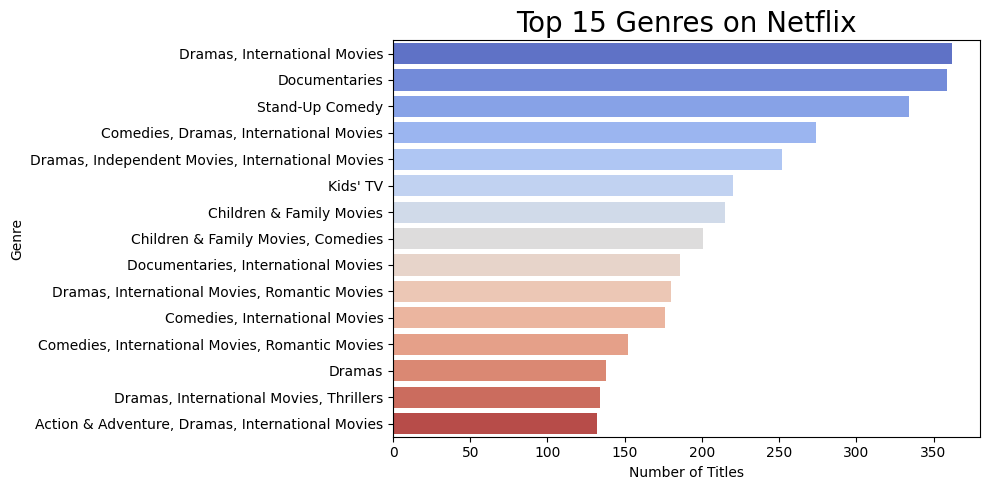

In [71]:
#content over different genres
genre = df['Genre'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x = genre.head(15).values, y=genre.head(15).index ,palette='coolwarm' )
plt.title("Top 15 Genres on Netflix", fontsize =(20))
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
plt.show()

<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Data Visualization - Part 2: distribution of content across release years.
</h1> 

In [72]:
year_counts = df['release_year'].value_counts().sort_index()
year_df = year_counts.reset_index()
year_df.columns = ['release_year', 'title_count']
fig = px.line(year_df,
              x='release_year',
              y='title_count',
              markers=True,
              title='Distribution of Netflix Content by Release Year',
              labels={'release_year': 'Release Year', 'title_count': 'Number of Titles'},
              line_shape='linear')

fig.update_traces(line_color='indigo')
fig.update_layout(template='plotly_white')

fig.show()

In [73]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Data Visualization - Part 3: geographical distribution of content
</h1> 

In [74]:
# Drop rows where country is missing
df = df.dropna(subset=['country'])

# Split multiple countries per row and explode
df['country_list'] = df['country'].str.split(', ')
df_exploded = df.explode('country_list')

# Count titles per country and content type
type_country_counts = df_exploded.groupby(['country_list', 'type']).size().reset_index(name='count')

# Plot with Plotly
fig1 = px.choropleth(
    type_country_counts,
    locations='country_list',
    locationmode='country names',
    color='count',
    facet_col='type',
    title='🌍 Netflix Content by Country and Type (Movie vs. TV Show)',
    color_continuous_scale='Oranges'
)
fig1.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig1.show()



<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Time Series Analysis:Total Netflix Titles Released Each Year
</h1> 

In [75]:

# Clean and filter years
df = df[df['release_year'].notnull()]
df['release_year'] = df['release_year'].astype(int)

# Count titles per year
yearly_counts = df.groupby('release_year').size().reset_index(name='title_count')

# Line plot with Plotly
fig = px.line(
    yearly_counts,
    x='release_year',
    y='title_count',
    markers=True,
    title='📅 Total Netflix Titles Released Each Year',
    labels={'release_year': 'Year', 'title_count': 'Number of Titles'},
    template='plotly_white'
)
fig.update_traces(line=dict(color='crimson', width=3))
fig.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Content Analysis - Part 1:Distribution of content Rating of Netflix
</h1>

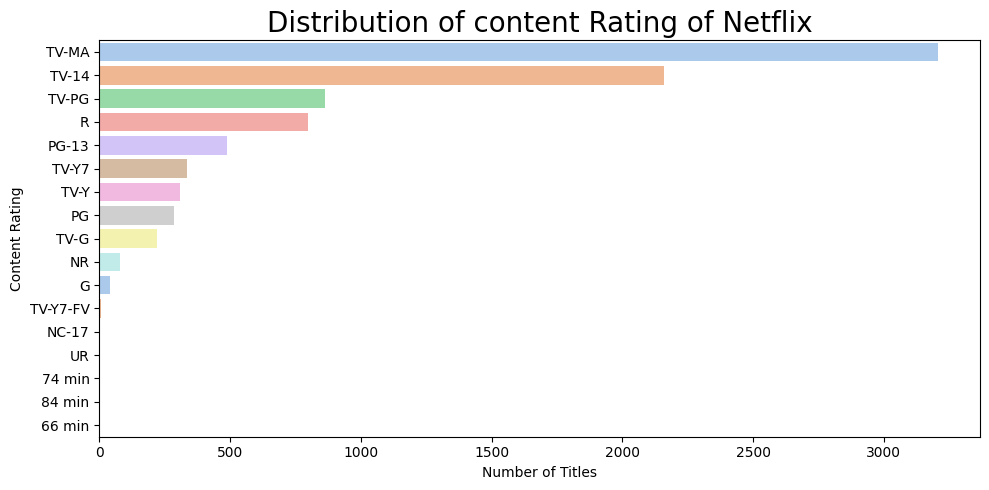

In [76]:
rating_count = df['rating'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x = rating_count.values, y=rating_count.index ,palette='pastel' )
plt.title("Distribution of content Rating of Netflix", fontsize =(20))
plt.xlabel('Number of Titles')
plt.ylabel('Content Rating')
plt.tight_layout()
plt.show()
plt.show()

<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Content Analysis - Part 2:length of movies or episodes and identify any trends.
</h1>

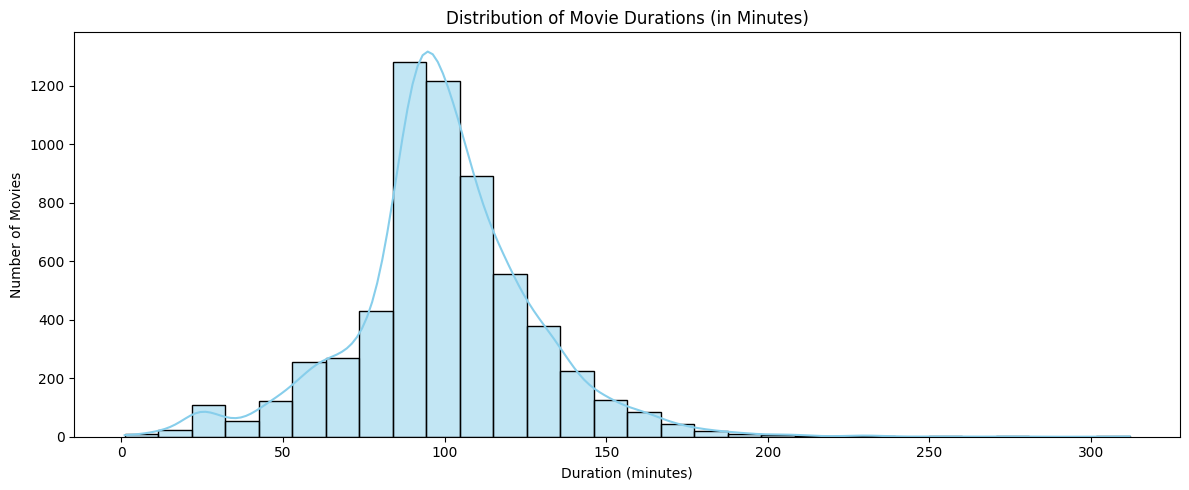

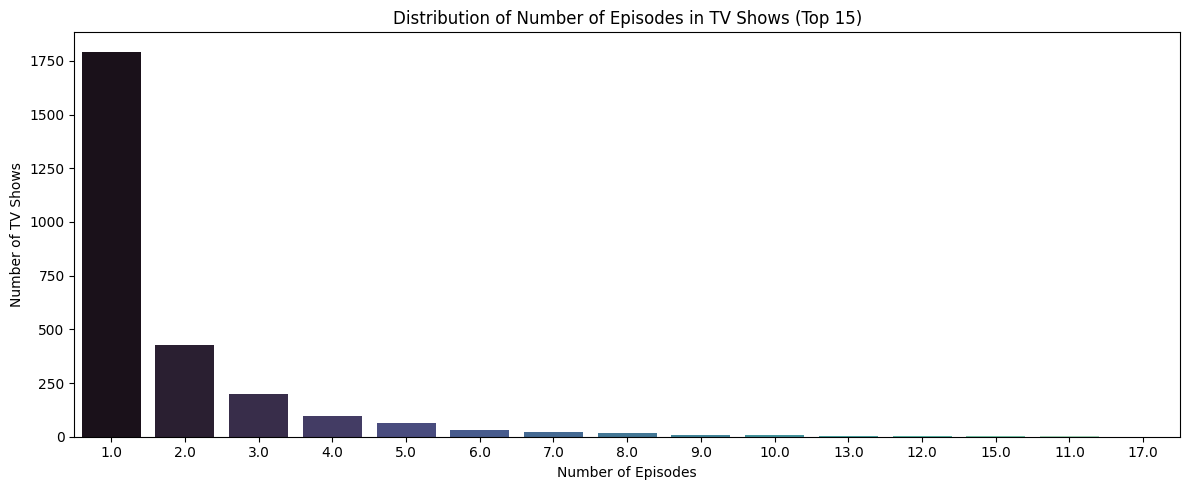

In [77]:
# Drop rows with missing duration
df = df.dropna(subset=['duration'])

# Separate Movies and TV Shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['num_episodes'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# --- Visualization ---

# Movie duration distribution
plt.figure(figsize=(12, 5))
sns.histplot(movies['duration_min'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# TV show episode count distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='num_episodes', data=tv_shows, order=tv_shows['num_episodes'].value_counts().index[:15], palette='mako')
plt.title('Distribution of Number of Episodes in TV Shows (Top 15)')
plt.xlabel('Number of Episodes')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Trends in Genre Popularity over Time
</h1>

In [78]:
# spliting genre 
df['Genre'] = df['Genre'].str.split(',')
df= df.explode('Genre')
df['Genre'] = df['Genre'].str.strip()


# groupby release year
genre_trends = df.groupby(['release_year','Genre']).size().reset_index(name='count')

# top 5 genre
top_5 = genre_trends.groupby('Genre')['count'].sum().nlargest(5).index

# using plotly to visualize trends of genre
fig = px.line(genre_trends, x='release_year', y='count', color='Genre',
              title="Trends in Genre Popularity over Time" ,
              labels={'release_year':'year' , 'count':'number of tiles'})
fig.show()



<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Geographical Analysis
</h1>

In [79]:
# Geographical analyze

#split country
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

#groupby  or counts
country_counts = df['country'].value_counts().reset_index()
country_counts.columns= ['country','counts']


# visualization

fig = px.choropleth(country_counts,locations='country',
                    locationmode='country names',
                    color ='counts',color_continuous_scale='Viridis',
                    title = "Distribution of content by country")
fig.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Correlation Analysis:
</h1>

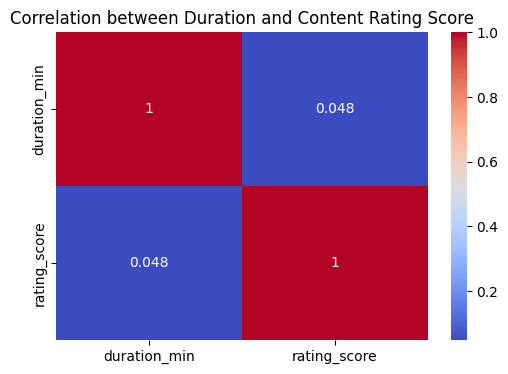

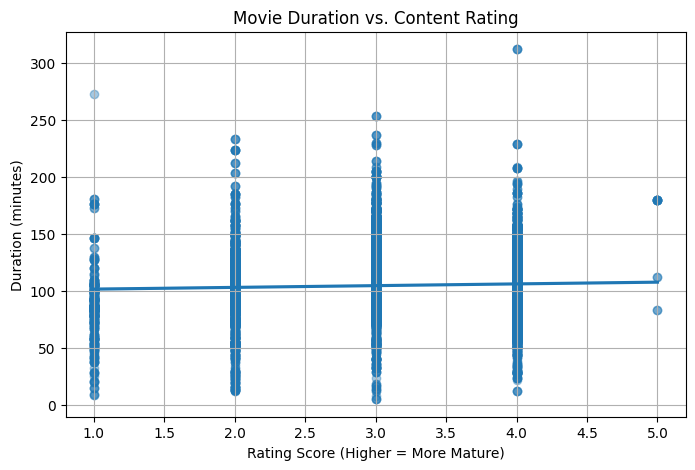

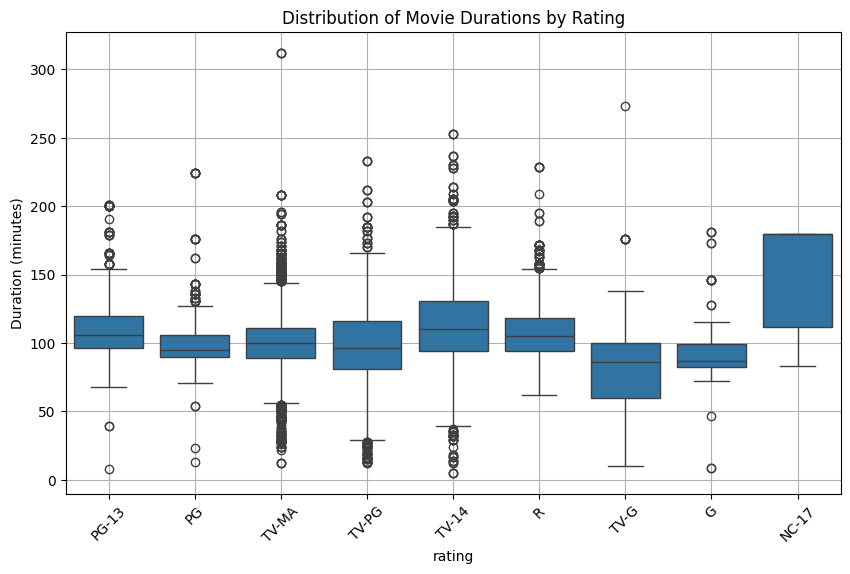

In [80]:
# Filter only movies with valid duration and rating
movies = df[(df['type'] == 'Movie') & df['duration'].notnull() & df['rating'].notnull()].copy()

# Extract duration in minutes
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

# Encode content ratings to numeric scale
rating_map = {
    'G': 1, 'TV-G': 1, 'PG': 2, 'TV-PG': 2,
    'PG-13': 3, 'TV-14': 3,
    'R': 4, 'TV-MA': 4,
    'NC-17': 5
}
movies['rating_score'] = movies['rating'].map(rating_map)

# Drop rows with missing encoded ratings
movies = movies.dropna(subset=['rating_score'])

# ---------------------
# 1. Correlation Heatmap
# ---------------------
corr = movies[['duration_min', 'rating_score']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Duration and Content Rating Score')
plt.show()

# ---------------------
# 2. Scatter Plot with Regression Line
# ---------------------
plt.figure(figsize=(8, 5))
sns.regplot(data=movies, x='rating_score', y='duration_min', scatter_kws={'alpha':0.4})
plt.title('Movie Duration vs. Content Rating')
plt.xlabel('Rating Score (Higher = More Mature)')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

# ---------------------
# 3. Boxplot: Duration Distribution by Rating
# ---------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies, x='rating', y='duration_min')
plt.title('Distribution of Movie Durations by Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Audience Engagement - Part 2:
</h1>

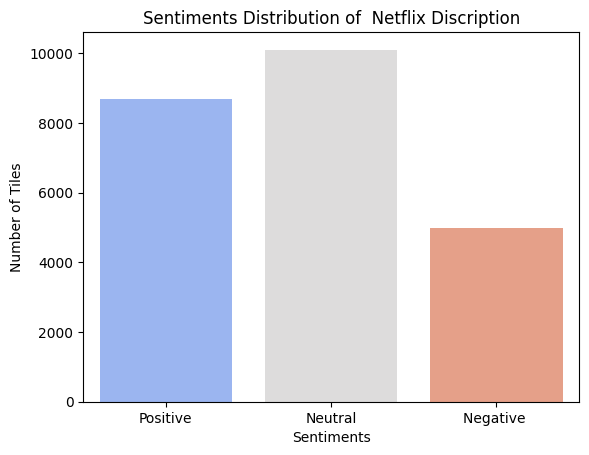

In [81]:
from textblob import TextBlob
# Analyze Sentiments 
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

#classify its positive/negative/neutral
def get_sentiment_label(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative '
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)  


#plot sentiments
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title("Sentiments Distribution of  Netflix Discription")
plt.xlabel("Sentiments")
plt.ylabel("Number of Tiles")
plt.show()

In [82]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,duration_num,duration_type,country_list,sentiment,sentiment_label
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,[United States],0.333333,Positive


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
 Content Variety:
</h1>

In [83]:

# Drop rows with missing genres
df = df.dropna(subset=['Genre'])

# Split and explode genres
df['genres'] = df['Genre'].str.split(', ')
all_genres = df.explode('genres')

# Count genre frequency
genre_counts = all_genres['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Interactive Plotly bar chart (Top 15 Genres)
fig = px.bar(genre_counts.head(15),
             x='Genre',
             y='Count',
             title='🎬 Top 15 Most Frequent Genres on Netflix',
             labels={'Genre': 'Genre/Category', 'Count': 'Number of Titles'},
             color='Count',
             color_continuous_scale='Tealgrn')

fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
Language Analysis:
</h1>

In [84]:

# Drop missing country values
df = df.dropna(subset=['country'])

# Split multiple countries and explode
df['country_list'] = df['country'].str.split(', ')
country_expanded = df.explode('country_list')

# Count entries per country
country_counts = country_expanded['country_list'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Optional: map countries to most likely language
language_map = {
    'India': 'Hindi',
    'United States': 'English',
    'United Kingdom': 'English',
    'France': 'French',
    'Spain': 'Spanish',
    'South Korea': 'Korean',
    'Japan': 'Japanese',
    'Mexico': 'Spanish',
    'Germany': 'German',
    'Canada': 'English/French',
    'Brazil': 'Portuguese',
    # Add more mappings if needed
}

country_counts['Language'] = country_counts['Country'].map(language_map)

# Aggregate by language
language_counts = country_counts.groupby('Language')['Count'].sum().reset_index()
language_counts = language_counts.dropna().sort_values(by='Count', ascending=False)

# Plotly interactive bar chart
fig = px.bar(language_counts,
             x='Language',
             y='Count',
             title='🎭 Distribution of Netflix Content by Language (Estimated)',
             labels={'Language': 'Language', 'Count': 'Number of Titles'},
             color='Count',
             color_continuous_scale='Plasma')

fig.update_layout(template='plotly_white')
fig.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
 Content Evolution Over Time:
</h1>

In [85]:
# Drop rows missing key info
df = df.dropna(subset=['release_year', 'duration'])

# Separate Movies and TV Shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract duration in minutes for Movies
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

# Extract number of episodes for TV Shows
tv_shows['num_episodes'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Group: Average movie duration by release year
movie_trend = movies.groupby('release_year')['duration_min'].mean().reset_index()

# Group: Average episodes per show by release year
tv_trend = tv_shows.groupby('release_year')['num_episodes'].mean().reset_index()

# Plot 1: Movie Duration Over Time
fig1 = px.line(movie_trend,
               x='release_year',
               y='duration_min',
               title='🎬 Average Movie Duration Over the Years',
               labels={'release_year': 'Release Year', 'duration_min': 'Average Duration (min)'},
               markers=True)
fig1.update_layout(template='plotly_white')
fig1.show()

# Plot 2: TV Show Episodes Over Time
fig2 = px.line(tv_trend,
               x='release_year',
               y='num_episodes',
               title='📺 Average Number of Episodes in TV Shows Over the Years',
               labels={'release_year': 'Release Year', 'num_episodes': 'Avg. Episodes'},
               markers=True)
fig2.update_layout(template='plotly_white')
fig2.show()


<h1 style="font-family: 'Poppins', sans-serif; font-weight: 700; 
           text-align:center; background: linear-gradient(90deg, #E74C3C, #A93226); 
           -webkit-background-clip: text; -webkit-text-fill-color: transparent; margin-top: 40px;">
User Preferences:
</h1>

In [86]:
# Drop missing genre data
df = df.dropna(subset=['Genre'])

# Split genres into lists and explode
df['genres'] = df['Genre'].str.split(', ')
df_exploded = df.explode('genres')

# Count genres by content type
genre_type_counts = df_exploded.groupby(['type', 'genres']).size().reset_index(name='count')

# Sort for plotting
top_genres = genre_type_counts.sort_values(by='count', ascending=False)

# Plotly grouped bar chart for top genres in Movies and TV Shows
fig = px.bar(top_genres,
             x='genres',
             y='count',
             color='type',
             title='🎭 Popular Genres by Content Type (Movie vs TV Show)',
             labels={'genres': 'Genre', 'count': 'Number of Titles', 'type': 'Content Type'},
             barmode='group')

fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Netflix Data Analytics - Conclusions & Recommendations</title>
  <style>
    body {
      font-family: 'Segoe UI', sans-serif;
      background-color: #f9f9f9;
      padding: 40px;
      color: #333;
    }
    h1 {
      background-color: #C0392B;
      color: white;
      padding: 15px 25px;
      border-radius: 8px;
      text-align: center;
    }
    h2 {
      color: #A93226;
      border-bottom: 2px solid #E74C3C;
      padding-bottom: 5px;
    }
    ul {
      margin-left: 20px;
      margin-top: 10px;
    }
    li {
      margin-bottom: 8px;
    }
    .section {
      margin-top: 40px;
    }
  </style>
</head>
<body>

  <h1>Netflix Data Analytics</h1>

  <div class="section">
    <h2>🔍 Conclusions</h2>
    <ul>
      <li><strong>Data Cleaning:</strong> Missing values were handled — “Unknown” was used for `director`, `cast`, and `country`; mode was used for `date_added` and `duration`.</li>
      <li><strong>Duration Split:</strong> `duration` was split into `duration_num` (numeric) and `duration_type` (either "min" or "season").</li>
      <li><strong>Movie Durations:</strong> Fairly symmetric distribution with significant variation; average around 90–120 minutes.</li>
      <li><strong>TV Show Durations:</strong> Mostly 1-season shows dominate the catalog; limited long-running series.</li>
      <li><strong>Genre Column:</strong> `listed_in` was renamed to `Genre` for better clarity.</li>
    </ul>
  </div>

  <div class="section">
    <h2>✅ Recommendations</h2>
    <ul>
      <li><strong>Standardize Movie Length:</strong> Aim for a common movie length (e.g., 90–120 mins) based on viewer preferences.</li>
      <li><strong>Series Strategy:</strong> Investigate if longer-running shows improve user retention compared to 1-season content.</li>
      <li><strong>Data Enrichment:</strong> Add ratings, view counts, and demographics to link content quality with performance.</li>
      <li><strong>Genre Focus:</strong> Perform genre-based performance analysis to identify high-performing but underrepresented genres.</li>
      <li><strong>Trend Analysis:</strong> Analyze `date_added` to reveal seasonal trends in new content additions.</li>
      <li><strong>Geographical Diversity:</strong> Use the `country` field to target expansion areas and discover regional content gaps.</li>
    </ul>
  </div>

</body>
</html>
